# yahoo_finance 

This module allows basic, low-level access to Yahoo Finance data (stock prices, dividends and splits). Simply start with

In [1]:
import yahoo_finance

## Basic Usage

You can download **stock quotes** with

In [2]:
quotes = yahoo_finance.download_quotes(symbol="GILD")
print quotes[0]
print quotes[-1]

{u'Volume': 168022400.0, u'Adj Close': 0.585014, u'High': 0.679688, u'Low': 0.539063, u'Date': datetime.datetime(1992, 1, 22, 0, 0), u'Close': 0.632813, u'Open': 0.539063}
{u'Volume': 11505700.0, u'Adj Close': 70.230003, u'High': 71.410004, u'Low': 69.910004, u'Date': datetime.datetime(2018, 6, 15, 0, 0), u'Close': 70.230003, u'Open': 71.099998}


By default this will download all the available price data (with a daily interval). However, you can **change the interval and the time range:**

In [3]:
import datetime

start = datetime.date(2014, 1, 1)
weekly_data = yahoo_finance.download_quotes("GILD", start_date=start, interval=yahoo_finance.WEEKLY)

print quotes[0]
print quotes[-1]

{u'Volume': 168022400.0, u'Adj Close': 0.585014, u'High': 0.679688, u'Low': 0.539063, u'Date': datetime.datetime(1992, 1, 22, 0, 0), u'Close': 0.632813, u'Open': 0.539063}
{u'Volume': 11505700.0, u'Adj Close': 70.230003, u'High': 71.410004, u'Low': 69.910004, u'Date': datetime.datetime(2018, 6, 15, 0, 0), u'Close': 70.230003, u'Open': 71.099998}


You can also download the **dividends** with

In [4]:
dividends = yahoo_finance.download_dividends("GILD")
print dividends[0]
print dividends[-1]

{u'Date': datetime.datetime(2016, 9, 14, 0, 0), u'Dividends': 0.47}
{u'Date': datetime.datetime(2017, 3, 14, 0, 0), u'Dividends': 0.52}


You can specify a time range for the dividends, too, using <code>start_date</code> and <code>end_date</code>.

## Getting Ready-To-Use Return Vectors

This module also allow quick access to synchronized return vectors (often required for further data manipulation): 

In [5]:
universe = ["ADS.DE", "SAP.DE", "BAS.DE", "VOW3.DE", "CON.DE"]

# download price data
price_data = [yahoo_finance.download_quotes(symbol) for symbol in universe]

# synchronize price data
# and calculate return vector
return_vector = yahoo_finance.get_return_vector(price_data)

The output is a simple <code>mXn</code> list where m equals the number of stocks and n the number of returns.

If the resulting price data is much smaller than the original dataset a warning will be raised:

In [6]:
universe = ["SAP.DE", "UN01.DE", "BAS.DE"]

price_data = [yahoo_finance.download_quotes(symbol) for symbol in universe]
syncd = yahoo_finance.synchronized_price_data(price_data)

yahoo_finance.py:180: UserWarning: Coverage treshold hit: resulting coverage is 8.17%.
  warnings.warn("Coverage treshold hit: resulting coverage is %.2f%%." % (coverage * 100))


By default the coverage treshold is 90%.

## Usage Example

### Simple Charting

Text(0.5,1,'Stock price of GILD in USD')

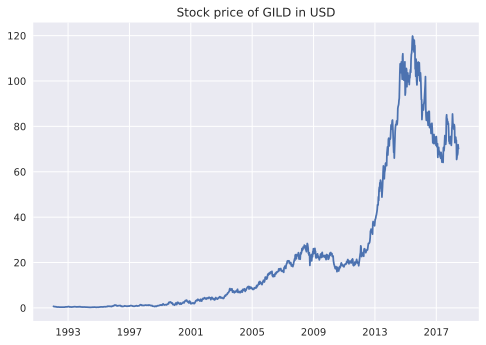

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('seaborn')

quotes = yahoo_finance.download_quotes("GILD", interval=yahoo_finance.WEEKLY)

plt.plot([day["Date"] for day in quotes], [day["Close"] for day in quotes])
plt.title("Stock price of GILD in USD")


Text(0.5,1,'Allianz SE. dividends in EUR')

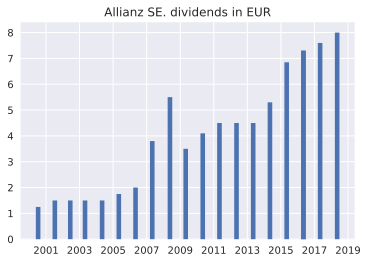

In [8]:
dividends = yahoo_finance.download_dividends("ALV.DE")

plt.bar([payout["Date"] for payout in dividends], [payout["Dividends"] for payout in dividends], width=100)
plt.title("Allianz SE. dividends in EUR")


### Get Correlations of certain Stock Universe

In [9]:
import yahoo_finance
import numpy

universe = ["SPY", "VNQ", "GRES", "VCLT", "TIP"] 
# SP500, REIT, Global Resources, Corp Debt, LT Gov Debt, ST Gov Debt

# get data
price_data = [yahoo_finance.download_quotes(symbol) for symbol in universe]
return_vector = yahoo_finance.get_return_vector(price_data)

# calculate corr coef
correlations = numpy.corrcoef(return_vector)

# plot it!
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap="seismic")
fig.colorbar(cax)
ticks = numpy.arange(0, correlations.shape[0], 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(universe)
ax.set_yticklabels(universe)
ax.grid(False)

yahoo_finance.py:180: UserWarning: Coverage treshold hit: resulting coverage is 33.71%.
  warnings.warn("Coverage treshold hit: resulting coverage is %.2f%%." % (coverage * 100))
